# Regressão Linear

## Justificativa matemática

Imagine que temos dados em tabelas, sendo que cada linha é uma observação e cada coluna uma variável. Nos então escolhemos uma das colunas para ser nossa variável dependente y (aquela que queremos prever) e as outras serão as variáveis independentes (X). Nosso objetivo é aprender como chegar das variáveis independentes na variável dependente, ou, em outras palavras, prever y a partir de X. Note, que X é uma matriz nxd, em que n é o número de observações e d o número de dimenções; y é um vetor coluna nx1. Podemos definir o problema como um sistema de equações, em que cada equação é uma observação:

$\begin{cases} 
w_0 + w_1 x_1 + ... + w_d x_1 = y_1 \\
w_0 + w_1 x_2 + ... + w_d x_2 = y_2 \\
... \\
w_0 + w_1 x_n + ... + w_d x_n = y_n \\
\end{cases}$

Normalmente, $n > d$, isto é, temos mais observações que dimenções. Sistemas assim costumam não ter solução; há muitas equações e poucas variávei para ajustar. Intuitivamente, pese que, na prática, muitas coisas afetam a variável y. Principalmente se ela for algo de interesse das ciências humanas, como, por exemplo, preço, desemprego, felicidade... E muitas das coisas que afetam y não podem ser coletadas como dados; as equações acima não tem solução porque não temos todos os fatores que afetam y. 

Para lidar com esse problema, vamos adicionar nas equações um termo erro $\varepsilon$ que representará os fatores que não conseguimos observar, erros de medição, etc.

$$\begin{cases} 
w_0 + w_1 x_{11} + ... + w_d x_{1d} +  \varepsilon_1 = y_1 \\
w_0 + w_1 x_{21} + ... + w_d x_{2d} + \varepsilon_2 = y_2 \\
... \\
w_0 + w_1 x_{n1} + ... + w_d x_{nd} + \varepsilon_3 = y_n \\
\end{cases}$$

Em forma de matriz:

$$ \begin{bmatrix}
    1 & x_{11} & ... & x_{1d} \\
    1 & x_{21} & ... & x_{2d} \\
    \vdots &  \vdots&  \vdots &  \vdots \\
    1 & x_{n1} & ... & x_{nd} \\
\end{bmatrix}
\times
\begin{bmatrix}
    w_0 \\
    w_1 \\
    \vdots \\
    w_d \\
\end{bmatrix}
+
\begin{bmatrix}
    \varepsilon_0 \\
    \varepsilon_1 \\
    \vdots \\
    \varepsilon_n \\
\end{bmatrix}
=
\begin{bmatrix}
    y_0 \\
    y_1 \\
    \vdots \\
    y_n \\
\end{bmatrix}$$


$$X_{nd} \pmb{w}_{d1} + \pmb{\epsilon}_{n1} = \pmb{y}_{n1}$$



Para estimar a equação acima, usaremos a técnica de Minimos Quadrados Ordinários (MQO): queremos achar os $\pmb{\hat{w}}$ que minimizam os $n$ $ \varepsilon^2 $, ou, na forma de vetor, $\pmb{\epsilon}^T \pmb{\epsilon}$. Por que minimizar os erros quadrados? Bom, não há uma resposta certa para isso. Note que os erros variam para mais e para menos e tem média zero, de forma que a soma deles será sempre muito próxima de zero. Então temos que fazer algo para que todos os erros sejam positivos. Poderiamos minizar os erros absolutos, mas a o quadrado dos erros também funciona e deixa a matemática bem mais simples: 

\begin{equation}
\begin{split}
    \pmb{\epsilon}^T  \pmb{\epsilon} &= (\pmb{y} - \pmb{\hat{w}}X)^T(\pmb{y} - \pmb{\hat{w}} X) \\
             &= \pmb{y}^T \pmb{y} - \pmb{\hat{w}}^T X^T \pmb{y} - \pmb{y}^T X \pmb{\hat{w}} + \pmb{\hat{w}} X^T X \pmb{\hat{w}} \\
             &= \pmb{y}^T \pmb{y} - 2\pmb{\hat{w}}^T X^T \pmb{y} + \pmb{\hat{w}} X^T X \pmb{\hat{w}}
\end{split}
\end{equation}

Aqui, usamos o fato que que $\pmb{\hat{w}}^T X^T \pmb{y}$ e $\pmb{y}^T X \pmb{\hat{w}}$ são simplesmente escalares $1x1$ e a trasposta de um escalar é o mesmo escalar: $\pmb{\hat{w}}^T X^T \pmb{y} = (\pmb{\hat{w}}^T X^T \pmb{y})^T = \pmb{y}^T X \pmb{\hat{w}}$. Derivando em $\pmb{\hat{w}}$ e achando a CPO:


$$\frac{\partial \pmb{\epsilon}^T \pmb{\epsilon}}{\partial \pmb{\hat{w}}} = -2X^T\pmb{y} + 2X^T X \pmb{\hat{w}} = 0$$


Derivando mais uma vez para checar a CSO chegamos em $2X^TX$, que é positiva definida se as colunas de X forem independentes. Temos então um ponto de mínimo quando:


$$ \pmb{\hat{w}} = (X^T X)^{-1} X^T \pmb{y}$$


Bom, parece que chegamos em algo interessante. Nos nossos dados temos $X$ e $\pmb{y}$, então podemos achar $\hat{\pmb{w}}$ facilmente: basta substituir os valores na fórmula! O próximo passo e desenhar o algorítmo e ver como ele se sai em dados reais.

OBS:  
1) Para mais detalhes, veja [este](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) passo a passo da Universidade de Stanford.  
2) Seria possível chegar em uma fórmula para os vários $\hat{w_i}$ apenas com cálculo multivariado, sem usar algebra linear. Embora a forma com algebra linear seja mais difícil (pelo menos foi para mim) ela vai nos ajudar no entendimento de como o algorítmo funciona. Algebra linear é uma ferramente poderosa de abstração e a vasta maioria dos algorítmos de aprendizado de máquina usam algebra linear em suas derivações, então é bom já irmos nos acostumando. 

## Desenhando  e testando o algoritmo

In [1]:
import pandas as pd # para ler os dados em tabela
import numpy as np # para álgebra linear
from sklearn import linear_model, model_selection, datasets # para comparar o nosso algoritmo com o de mercado
import matplotlib.pyplot as plt # para fazer gráfico
from matplotlib import style
from time import time # para ver quanto tempo demora
style.use('ggplot')
np.random.seed(1)

class linear_regr(object):

    def __init__(self):
        pass


    def fit(self, X_train, y_train):
        # adiciona coluna de 1 nos dados
        X = np.insert(X_train, 0, 1, 1)

        # estima os w_hat
        w_hat = np.dot( np.dot( np.linalg.inv(np.dot(X.T, X)), X.T), y_train)
                                    # (X^T * X)^-1 * X^T * y
        self.w_hat = w_hat
        self.coef = self.w_hat[1:]
        self.intercept = self.w_hat[0]


    def predict(self, X_test):
        X = np.insert(X_test, 0, 1, 1) # adiciona coluna de 1 nos dados
        y_pred = np.dot(X, self.w_hat) # X * w_hat = y_hat
        return y_pred


Ok, teoria justificada e algoritmo pronto. Vamos ver se ele consegue aprender os $\hat{\pmb{w}}$ de dados reais.
OBS: Os dados podem ser econtrados em http://www.cengage.com/aise/economics/wooldridge_3e_datasets/.  
  
  
Lendo e processando os dados:

In [2]:
data = pd.read_csv('hprice.csv', sep=',') # lendo os dados
data.fillna(-99999, inplace = True) # preenchendo valores vazios
X = np.array(data.drop(['price'], 1)) # escolhendo as variável independentes
y = np.array(data['price']) # escolhendo a variável dependente

# separa em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)
data.head(5)

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630


Treinando, testando e comparando o regressor.

In [3]:
t0 = time()
regr = linear_regr()
regr.fit(X_train, y_train)
print("Tempo do criado manualmente:", round(time()-t0, 3), "s")

# medindo os erros
y_hat = regr.predict(X_test) # prevendo os preços

print('R^2: ', ( np.sum((y_hat - y_test.mean()) ** 2) / np.sum((y_hat - y_test)**2)))
print('Média do erro absoluto: ', np.absolute((y_hat - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat - y_test) / y_test)).mean())
print('\nCoeficientes:', np.round(regr.w_hat, 2))


# comparando com o de mercado
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("\n\nTempo do de mercado:", round(time()-t0, 3), "s")

# medindo os erros
y_hat = regr.predict(X_test) # prevendo os preços
w_hat = regr.intercept_
w_hat = np.append(w_hat, regr.coef_)

print('R^2: ', ( np.sum((y_hat - y_test.mean()) ** 2) / np.sum((y_hat - y_test)**2)))
print('Média do erro absoluto: ', np.absolute((y_hat - y_test)).mean())
print('Média do erro relativo: ', np.absolute(((y_hat - y_test) / y_test)).mean())
print('\nCoeficientes:', np.round(w_hat, 2))


Tempo do criado manualmente: 0.005 s
R^2:  48.8530378977
Média do erro absoluto:  10.1255155742
Média do erro relativo:  0.0332150279277

Coeficientes: [ 381.57    1.22    3.22   -0.     -0.     -0.5   269.71 -395.92    7.62
   26.3 ]


Tempo do de mercado: 0.012 s
R^2:  48.8530378944
Média do erro absoluto:  10.1255155744
Média do erro relativo:  0.0332150279289

Coeficientes: [ 381.57    1.22    3.22   -0.     -0.     -0.5   269.71 -395.92    7.62
   26.3 ]


Parece muito bom. O erro previsto é, na média, apenas 3.3% diferente do preço real/observado. Note que o algoritmo aprendeu os parâmetros $\hat{\pmb{w}}$ com uma parte dos dados e usou para prever dados que nunca tinha visto, mostando uma boa capacidade de generalização. Agora, o $R^2$ foi baixo, indicando que as variáveis utilizadas só explicam $48\%$ da variação nos preços.

O nosso algoritmo produz os mesmos resultados do de mercado, então podemos saber que não erramos nada. Além disso, o nosso algoritmo é mais rápido que o de mercado, mas essa diferênça é insignificante, em termos práticos. Cabe aqui uma observação: **não reinvente a roda!**. Ná prática, se existe um bom algorítmo já feito, use-o! Não é preciso fazer o algorítmo do zero sempre, basta importar o do sklearn! Aqui, estamos recriando os algorítmos apenas para melhor entendimento de como ele funciona, mas não com intenção de usar nossa criação na prática. Além disso, os algorítmos já pronto são muuuito melhores e mais rápidos que o nosso. O modelo de regressão linear é apenas uma exceção devido à sua simplicidade


A vantágem do modelo de regressão linear é o que chamamos de um modelo caixa branca: nos sabemos exatamente como ele aprende os parâmetros e ainda nos oferece capacidade interpretativa por meios deles. Infelizmente, a capacidade interpretativa depende de um aprofundamento que não é a intenção desse tutorial. Caso queira se aprofundar no alorítmo, veja [1](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) ou [2](https://www.coursera.org/learn/erasmus-econometrics).

Outra vantágem da regressão linear por MQO é que o processo de treinamento é muuuuuito rápido treinar. Muito mesmo. Mesmo com milhões de dados, é possível estimar os parâmetros em menos de um segundo. Além disso, uma vez treinado, o regressor ocupa muito pouco espaço, pois só armazena o vetor $\pmb{\hat{w}}$.

Vale uma nota de atenção: esse algoritmo é a base da econometria e da ciência de dados inferencial no geral. Aqui só podemos abordá-lo brevemente. Ainda há problemas de iferência (saber se os coeficientes são estatisticamente significantes), de interpretação em outras escalar, de hipóteses assumidas e o que fazer quando elas são violadas. Tenha isso em mente na hora de usá-lo! Muita coisa ficou incompleta aqui.

   
## Indo um pouco além

Nós chegamos em um fórmula muito útil $\pmb{\hat{w}} = (X^T X)^{-1} X^T \pmb{y}$, mas, para mim, ainda não está claro o que essa fórmula faz, além de minimizar os erros quadrados. O objetivo aqui é entender melhor como o algorítmo funciona por meio de vizualização e exemplos. 

Bom, a primeira coisa que notamos é que $X\pmb{\hat{w}}$ produz $\pmb{\hat{y}}$ e não $\pmb{y}$. Há uma diferênça entre $\pmb{\hat{y}}$ e $\pmb{y}$ que é um resíduo $\pmb{\epsilon}$. Podemos então definir:

\begin{equation}
\begin{split}
    \pmb{\epsilon} &= \pmb{y} - X \pmb{\hat{w}} \\
             &= \pmb{y} - X (X^T X)^{-1} X^T \pmb{y} \\
             &= [I -  X (X^T X)^{-1} X^T] \pmb{y} \\
             &= M\pmb{y}
\end{split}
\end{equation}

Além disso:

\begin{equation}
\begin{split}
    \pmb{\hat{y}} &= \pmb{y} - \pmb{e} \\
             &= [I - M]\pmb{y} \\
             &= X (X^T X)^{-1} X^T \pmb{y}
\end{split}
\end{equation}

Chamaremos $X (X^T X)^{-1} X^T$ de $P$. A matriz $P$ transforma $\pmb{y}$ em $\pmb{\hat{y}}$, mas como? De alguma forma, eu acredito que entender essa matriz é a chave para vizualizar como o algorítmo de MQO funciona. Vamos criar um exemplo hipotético com poucos números para facilitar a vizualização.

In [4]:
X = np.array([[1, 2],
              [2, 1],
              [3, 4],
              [5, 1],
              [2, 6],
              [3, 3]])
w = np.array([[4], 
              [1]])

y =  np.dot(X, w) + np.reshape(np.random.normal(0, 0.5, 6), (6, 1))

np.round(y, 2)

array([[  6.81],
       [  8.69],
       [ 15.74],
       [ 20.46],
       [ 14.43],
       [ 13.85]])

In [5]:
P = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T, X))), X.T)
y_hat = np.dot(P, y)
y_hat

array([[  6.01718147],
       [  8.70752746],
       [ 15.8336541 ],
       [ 20.10540092],
       [ 14.25225327],
       [ 14.72470894]])

Note como $\pmb{\hat{y}}$ representa a relação linear entre $X$ e $y$ retirando parte do ruido. Por exemplo, para a primeira observação, não fosse o ruido, $y_1$ seria $6$ e $\hat{y_1}$ é bem mais próximo de $6$ do que $y_1$. Se todas as variáveis relevantes estão em $X$, a matrix $P$ pode então ser vista como um filtro de ruido. A forma como eu gosto de vizualizar $P$ é como uma matriz projeção: $P$ projeta o vetor $\pmb{y}$ em $\pmb{\hat{y}}$ de forma que o reíduo seja ortogonal a $\pmb{\hat{y}}$. O resíduo ser ortogonal significa que ele não tem nenhuma relação com $\pmb{\hat{y}}$ e se ele também não tiver correlação com $\pmb{y}$, então estaremos achando a melhor relação entre as variável dependentes e independentes.

Mas isso chama a atenção para um problema muito sério: normalmente não temos todas as variáveis relevantes para explicar um fenômeno. O que acontece nesse caso?

Vamos refazer o exemplo, mas agora, suponha que não possâmos medir a segunda variável.

In [6]:
x = np.delete(X, 1, 1)
x

array([[1],
       [2],
       [3],
       [5],
       [2],
       [3]])

Nesse caso, $x$ é apenas um vetor e $X (X^T X)^{-1} X^T$ se reduz para $\frac{1}{k} X X^T$ em que $k = X^T X$. 

In [7]:
P = np.dot(x, x.T) / np.dot(x.T, x)
y_hat = np.dot(P, y)
y_hat


array([[  4.69497763],
       [  9.38995526],
       [ 14.08493288],
       [ 23.47488814],
       [  9.38995526],
       [ 14.08493288]])

Note que obtemos agora um resultado divergente do que seria o real sem o ruído. Para a primeira observação, por exemplo, sem ruído teriamos 6, mas a nossa estimativa é menor do que 4! Note que a variável que mais contribui para $y$ é $x_1$ (contribui 4x mais), e mesmo que a tenhamos, simplemente não conseguimos achar o resultado correto se nos falta $x_2$.

No entanto, essa é ainda a melhor estimativa que podemos fazer com os dados que temos (lembre que assumimos que não podiamos observar $x_2$). Como sabemos disso? Bom, ainda estamos minimizando os erros quadrados, esse é um argumento. Do ponto de vista de projeções, nós ainda estamos projetando $y$ em $\hat{y}$ de forma que os resíduos sejam ortogonais à $\hat{y}$:


In [8]:
e = y - y_hat
np.round(np.dot(e.T, y_hat), 10)

array([[-0.]])

Viu? O produto interno entre dois vetores ortogonais é zero, então é se se esperar que tenhamos conseguido zero no produto interno acima: $\pmb{\epsion}$ e \pmb{y} são ortogonais! Como estamos em apenas duas dimenções, podemos vizualizar as projeções facilmente. Lembre-se que, do ponto de vista geométrico, ortogonalidade se reflete em vetores perpendiculares. 

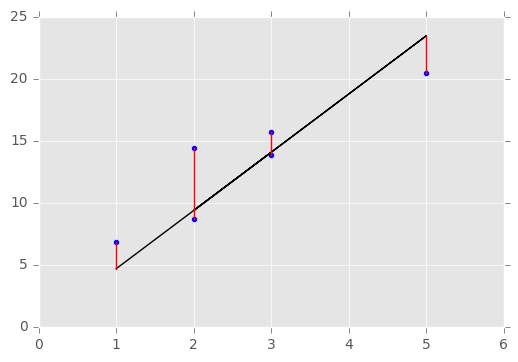

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y_hat, color='k')
plt.scatter(x, y)
for i, xi in enumerate(list(x)):
    plt.plot([xi, xi], [y[i], y_hat[i]], color='red')
plt.show()

Mas espere um minuto, isso não parece nada ortogonal... A linha vermelha não está paralela à preta! Eu quebrei a cabeça por horas com esse problema e ainda acho ele um tanto difícil então preste atenção e mostraremos como essas linhas são sim ortogonais.

Primeiro, lembre que a linha preta é a equação $\pmb{\hat{y}} = \pmb{x}\pmb{\hat{w}}$. A unica variável que influencia $\pmb{\hat{y}}$ é, nesse caso, $\pmb{x}$. Pos isso, fizemos o gráfico acima em apenas duas dimenções: $x$ e $y$. No entanto, o gráfico acima também tem $\pmb{y}$. Mas $\pmb{y}$, além de depender de $\pmb{x}$ também depende de $\pmb{\epsilon}$: $\pmb{y} = \pmb{x}\pmb{\hat{w}} + \pmb{\epsilon}$. Há então uma dimenção faltando no gráfico acima se queremos vizualizar a relação entre $\pmb{\epsilon}$, $\pmb{x}$, $\pmb{\hat{y}}$ e $\pmb{y}$!

Assim, quando adicionamos a dimenção relativa à  $\pmb{\epsilon}$ conseguimos ver que ele é ortogonal ao plano definido por $\pmb{\hat{y}} = \pmb{x}\pmb{\hat{w}}$. Agora sim, podemos vizualizar o que a matemática tinha nos mostrado apenas com números!

<IPython.core.display.Javascript object>


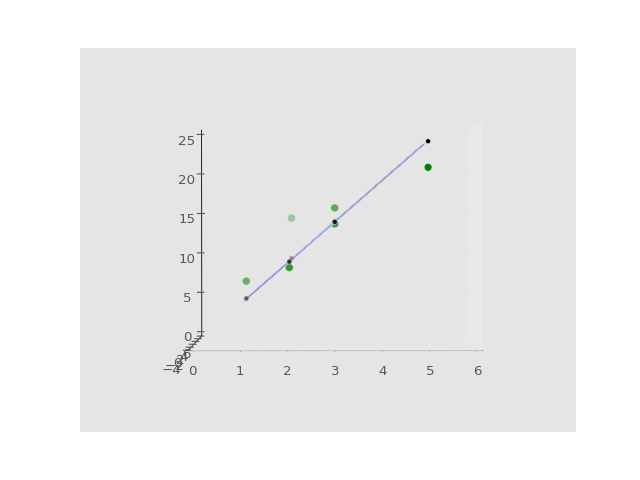

In [11]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

w_hat = np.dot( np.dot( np.linalg.inv(np.dot(x.T, x)), x.T), y)

fig = plt.figure()
ax = fig.gca(projection='3d')
X, E = np.meshgrid(x, e)
Y_hat = X*w_hat + 0
surf = ax.plot_surface(X, E, Y_hat, rstride=1, cstride=1, color='b')

ax.scatter(x, e, y_hat, c='k', marker='o')
ax.scatter(x, e, y, c='g', marker='o', s = 50)

plt.show()


<IPython.core.display.Javascript object>


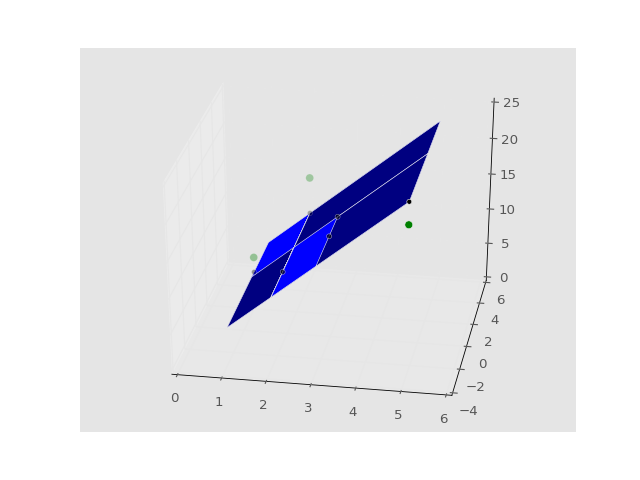

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, E = np.meshgrid(x, e)
Y_hat = X*w_hat + 0
surf = ax.plot_surface(X, E, Y_hat, rstride=1, cstride=1, color='b')

ax.scatter(x, e, y_hat, c='k', marker='o')
ax.scatter(x, e, y, c='g', marker='o', s = 50)

plt.show()

<IPython.core.display.Javascript object>


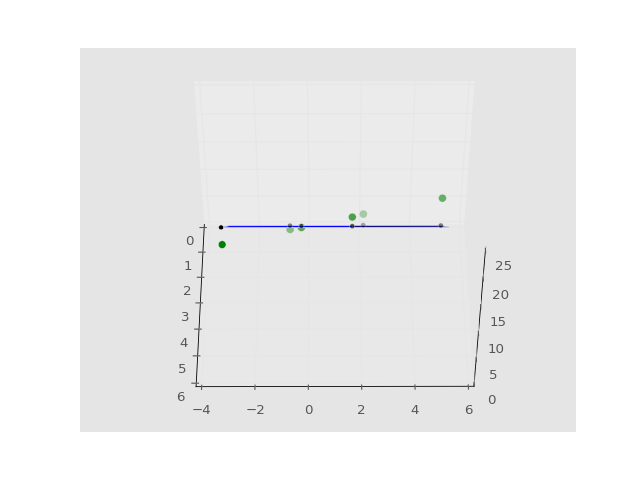

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, E = np.meshgrid(x, e)
Y_hat = X*w_hat + 0
surf = ax.plot_surface(X, E, Y_hat, rstride=1, cstride=1, color='b')

ax.scatter(x, e, y_hat, c='k', marker='o')
ax.scatter(x, e, y, c='g', marker='o', s = 50)

plt.show()